# Setup: load & inspect data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Downloads/finance.csv')

# Inspect
print(df.head())
print(df.info())
print(df.describe())

     State  Year  Totals.Capital outlay  Totals.Revenue  Totals.Expenditure  \
0  ALABAMA  1992                 664748        10536166             9650515   
1  ALABAMA  1993                 781952        11389335            10242374   
2  ALABAMA  1994                 767100        11599362            10815221   
3  ALABAMA  1995                 808001        12279726            11541881   
4  ALABAMA  1996                 760751        12741148            12126587   

   Totals.General expenditure  Totals.General revenue  \
0                     8788293                 8910315   
1                     9339796                 9688246   
2                     9922352                10014415   
3                    10489513                10582838   
4                    10991713                10894396   

   Totals.Insurance trust  revenue  Totals.Intergovernmental  \
0                          1473217                   2737180   
1                          1570768                   2

# Data Cleaning

In [2]:
# 3.1 Drop or handle missing values
# Check missing
print(df.isna().sum())

# Suppose some columns have missing entries: fill, drop or impute
# e.g., drop rows where Totals.Revenue is missing
df = df.dropna(subset=['Totals.Revenue'])

# Or fill missing with zero or mean
df['Totals.Capital outlay'] = df['Totals.Capital outlay'].fillna(0)

# 3.2 Data type corrections
# Ensure numeric columns are numeric
for col in ['Totals.Capital outlay', 'Totals.Revenue', 'Totals.Expenditure']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert non-numeric to NaN

# Again drop rows where numeric conversion failed
df = df.dropna(subset=['Totals.Expenditure'])

# 3.3 Outliers / unreasonable values
# E.g., negative expenditures or revenues might not make sense
df = df[df['Totals.Revenue'] >= 0]
df = df[df['Totals.Expenditure'] >= 0]

# 3.4 Add derived columns
df['Revenue_minus_Expenditure'] = df['Totals.Revenue'] - df['Totals.Expenditure']
df['Revenue_to_Expenditure_ratio'] = df['Totals.Revenue'] / (df['Totals.Expenditure'] + 1e-9)


State                                                                      0
Year                                                                       0
Totals.Capital outlay                                                      0
Totals.Revenue                                                             0
Totals.Expenditure                                                         0
Totals.General expenditure                                                 0
Totals.General revenue                                                     0
Totals.Insurance trust  revenue                                            0
Totals.Intergovernmental                                                   0
Totals.License tax                                                         0
Totals.Selective sales tax                                                 0
Totals.Tax                                                                 0
Details.Correction.Correction Total                                        0

# Visualization with Matplotlib (5 plots)

Plot 1: Total Revenue over Time for a Specific State

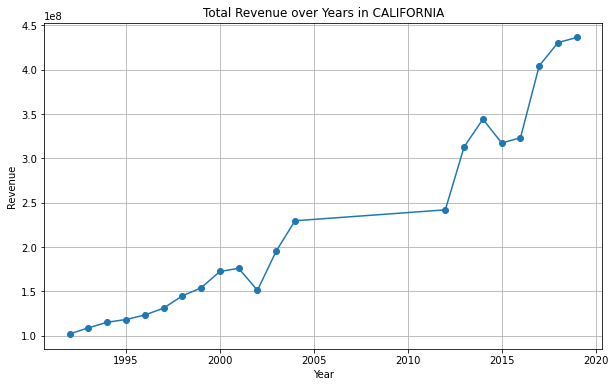

In [3]:
state = 'CALIFORNIA'  # pick a state present in the data
df_state = df[df['State'] == state]

plt.figure(figsize=(10,6))
plt.plot(df_state['Year'], df_state['Totals.Revenue'], marker='o')
plt.title(f"Total Revenue over Years in {state}")
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


Plot 2: Compare Revenue vs Expenditure for a State

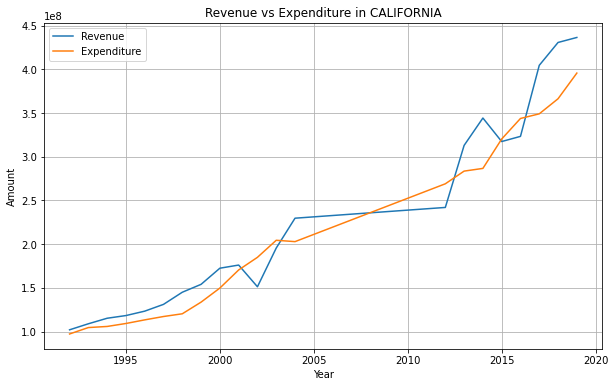

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df_state['Year'], df_state['Totals.Revenue'], label='Revenue')
plt.plot(df_state['Year'], df_state['Totals.Expenditure'], label='Expenditure')
plt.title(f"Revenue vs Expenditure in {state}")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


Plot 3: Scatter Plot of Revenue vs Expenditure across all States for a Given Year

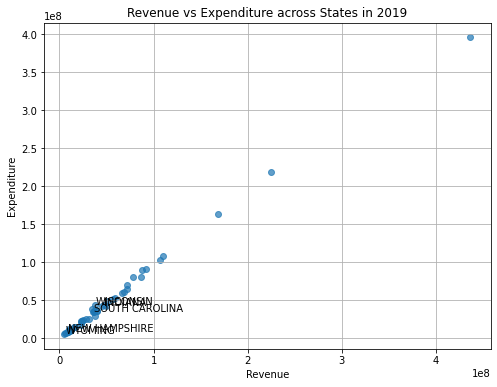

In [5]:
year = 2019
df_year = df[df['Year'] == year]

plt.figure(figsize=(8,6))
plt.scatter(df_year['Totals.Revenue'], df_year['Totals.Expenditure'], alpha=0.7)
plt.title(f"Revenue vs Expenditure across States in {year}")
plt.xlabel('Revenue')
plt.ylabel('Expenditure')
plt.grid(True)
# Optionally annotate some points
for _, row in df_year.sample(5).iterrows():
    plt.annotate(row['State'], (row['Totals.Revenue'], row['Totals.Expenditure']))
plt.show()


Plot 4: Histogram of Revenue‐to‐Expenditure Ratio

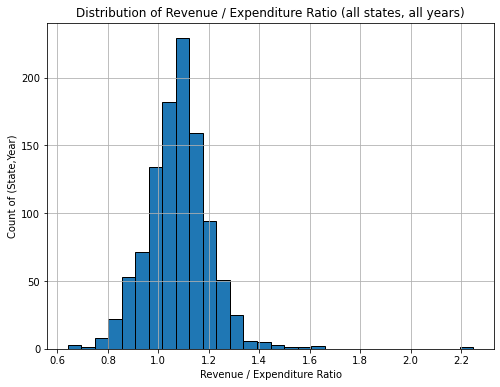

In [6]:
plt.figure(figsize=(8,6))
plt.hist(df['Revenue_to_Expenditure_ratio'], bins=30, edgecolor='black')
plt.title("Distribution of Revenue / Expenditure Ratio (all states, all years)")
plt.xlabel('Revenue / Expenditure Ratio')
plt.ylabel('Count of (State,Year)')
plt.grid(True)
plt.show()


Plot 5: Bar Plot of Top 10 States by Average Revenue

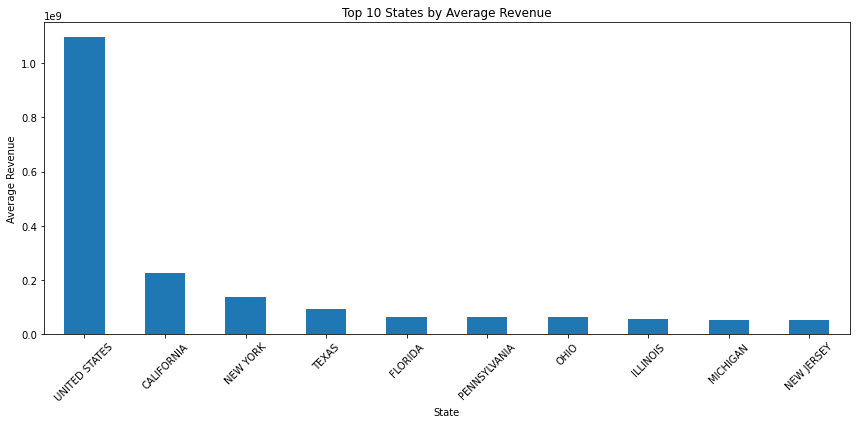

In [7]:
avg_rev = df.groupby('State')['Totals.Revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
avg_rev.plot(kind='bar')
plt.title("Top 10 States by Average Revenue")
plt.xlabel('State')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
